In [1]:
"""
CMU: IT3389 Applied AI Project
Title: Data Preprocessing on Dataset 
Student Name: CHEE BO YU
Admin No: 214322H
"""

'\nCMU: IT3389 Applied AI Project\nTitle: Data Preprocessing on Dataset \nStudent Name: CHEE BO YU\nAdmin No: 214322H\n'

### Informations about the dataset

#### Synthetically generated dataset containing Stroke Prediction metrics and all the required fields to build robust AI/ML models to detect Stroke

#### 15,000 records & 22 fields of stroke prediction dataset, containing:
##### 1: 'Patient ID'
##### 2: 'Patient Name'
##### 3: 'Age'
##### 4:'Gender'
##### 5: 'Hypertension'
##### 6: 'Heart Disease'
##### 7: 'Marital Status'
##### 8: 'Work Type'
##### 9: 'Residence Type'
##### 10: 'Average Glucose Level'
##### 11: 'Body Mass Index (BMI)'
##### 12: 'Smoking Status'
##### 13: 'Alcohol Intake'
##### 14: 'Physical Activity'
##### 15: 'Stroke History'
##### 16: 'Family History of Stroke'
##### 17:'Dietary Habits'
##### 18: 'Stress Levels'
##### 19: 'Blood Pressure Levels'
##### 20: 'Cholesterol Levels'
##### 21: 'Symptoms'
##### 22: 'Diagnosis

#### Kaggle Link: https://www.kaggle.com/datasets/teamincribo/stroke-prediction/data

#### Relevance of the Data

##### The data is highly relevant for building a predictive model for stroke prediction. Each field in the dataset provides valuable information about the patient’s health and lifestyle, which are important factors in predicting the likelihood of a stroke. By predicting the likelihood of a stroke, we can gain valuable insights into potential causes of dementia, as this project aims to detect dementia. Understanding stroke predictors can contribute to our knowledge of dementia, given the established link between stroke and certain types of dementia. 

#### Irregularities in the Data

##### Any irregularities in the data, such as missing values or outliers, will be carefully handled during the data cleaning and preprocessing stage to ensure that they do not negatively impact the performance of the predictive model.

#### Data Preparation Summary

##### This includes handling missing values, one-hot encoding on numerical to categorical values, handling outliers, and creating new features through one hot encoding. These steps are important to ensure that the irregularities in the data do not negatively impact the performance of the predictive model.

#### Challenges in Dataset Integration: Exploring the Incompatibility Between Stroke-Related and Health Parameter Datasets

##### I cannot directly join the two datasets based on a common identifier due to that they seem to represent different aspects of health and medical information. The first dataset focuses on stroke-related information, including patient details, lifestyle factors, symptoms, and stroke diagnosis. The second dataset, on the other hand, provides information on diabetes, alcohol level, heart rate, blood oxygen level, body temperature, weight, MRI delay, and dementia.

##### Without a shared identifier like a common patient ID, name, or other unique key, it becomes challenging to establish a direct connection between the records in the two datasets. Additionally, the nature of the information in each dataset is different – one is centred around stroke-related data, while the other focuses on various health parameters and conditions.

## Unveiling Insights: A Comprehensive Analysis of Stroke Prediction Dataset

### Importing all the libraries

### Importing natural language toolkit (nltk) 

In [2]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\boyuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\boyuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\boyuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\boyuc\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\boyuc\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

### Tells Python to bring the pandas data analysis library into my environment. 

In [3]:
import pandas as pd

### A library that provides a set of high level functions and features for performing data analysis and manipulation

In [4]:
import numpy as np

### Locating the dataset for stroke_prediction_dataset.csv

In [5]:
# This code will read and display all the contents in the csv file.
boyu_df = pd.read_csv('stroke_prediction_dataset.csv')
boyu_df

Patient ID       Patient Name  Age  Gender  Hypertension  \
0           18153    Mamooty Khurana   56    Male             0   
1           62749  Kaira Subramaniam   80    Male             0   
2           32145      Dhanush Balan   26    Male             1   
3            6154        Ivana Baral   73    Male             0   
4           48973  Darshit Jayaraman   51    Male             1   
...           ...                ...  ...     ...           ...   
14995       13981          Keya Iyer   88  Female             1   
14996       87707       Anahita Virk   47  Female             0   
14997       33174         Ivana Kaur   35    Male             0   
14998       22343        Anvi Mannan   73    Male             0   
14999       11066      Gokul Trivedi   64  Female             0   

       Heart Disease Marital Status       Work Type Residence Type  \
0                  1        Married   Self-employed          Rural   
1                  0         Single   Self-employed          Urban   
2                  1        Married    Never Worked          Rural   
3                  0        Married    Never Worked          Urban   
4                  1       Divorced   Self-employed          Urban   
...              ...            ...             ...            ...   
14995              1       Divorced   Self-employed          Urban   
14996              0        Married         Private          Urban   
14997              0        Married  Government Job          Rural   
14998              0         Single   Self-employed          Urban   
14999              0         Single    Never Worked          Urban   

       Average Glucose Level  ...    Alcohol Intake Physical Activity  \
0                     130.91  ...    Social Drinker          Moderate   
1                     183.73  ...             Never               Low   
2                     189.00  ...            Rarely              High   
3                     185.29  ...  Frequent Drinker          Moderate   
4                     177.34  ...            Rarely               Low   
...                      ...  ...               ...               ...   
14995                 160.22  ...    Social Drinker              High   
14996                 107.58  ...             Never               Low   
14997                 134.90  ...            Rarely              High   
14998                 169.42  ...             Never              High   
14999                 186.88  ...            Rarely          Moderate   

      Stroke History Family History of Stroke  Dietary Habits Stress Levels  \
0                  0                      Yes           Vegan          3.48   
1                  0                       No           Paleo          1.73   
2                  0                      Yes           Paleo          7.31   
3                  0                       No           Paleo          5.35   
4                  0                      Yes     Pescatarian          6.84   
...              ...                      ...             ...           ...   
14995              0                       No           Paleo          1.12   
14996              1                       No     Gluten-Free          1.47   
14997              1                       No           Paleo          0.51   
14998              0                      Yes           Paleo          1.53   
14999              0                       No           Vegan          4.57   

      Blood Pressure Levels  Cholesterol Levels  \
0                   140/108   HDL: 68, LDL: 133   
1                    146/91    HDL: 63, LDL: 70   
2                    154/97    HDL: 59, LDL: 95   
3                    174/81   HDL: 70, LDL: 137   
4                    121/95    HDL: 65, LDL: 68   
...                     ...                 ...   
14995                171/92   HDL: 44, LDL: 153   
14996                155/71   HDL: 35, LDL: 183   
14997               121/110   HDL: 57, LDL: 159   
14998                157/

## Get a general understanding of the data 

In [6]:
# This code will display the top 5 rows in all the columns.
boyu_df.head()

Patient ID       Patient Name  Age Gender  Hypertension  Heart Disease  \
0       18153    Mamooty Khurana   56   Male             0              1   
1       62749  Kaira Subramaniam   80   Male             0              0   
2       32145      Dhanush Balan   26   Male             1              1   
3        6154        Ivana Baral   73   Male             0              0   
4       48973  Darshit Jayaraman   51   Male             1              1   

  Marital Status      Work Type Residence Type  Average Glucose Level  ...  \
0        Married  Self-employed          Rural                 130.91  ...   
1         Single  Self-employed          Urban                 183.73  ...   
2        Married   Never Worked          Rural                 189.00  ...   
3        Married   Never Worked          Urban                 185.29  ...   
4       Divorced  Self-employed          Urban                 177.34  ...   

     Alcohol Intake Physical Activity Stroke History Family History of Stroke  \
0    Social Drinker          Moderate              0                      Yes   
1             Never               Low              0                       No   
2            Rarely              High              0                      Yes   
3  Frequent Drinker          Moderate              0                       No   
4            Rarely               Low              0                      Yes   

   Dietary Habits Stress Levels Blood Pressure Levels  Cholesterol Levels  \
0           Vegan          3.48               140/108   HDL: 68, LDL: 133   
1           Paleo          1.73                146/91    HDL: 63, LDL: 70   
2           Paleo          7.31                154/97    HDL: 59, LDL: 95   
3           Paleo          5.35                174/81   HDL: 70, LDL: 137   
4     Pescatarian          6.84                121/95    HDL: 65, LDL: 68   

                                            Symptoms  Diagnosis  
0                      Difficulty Speaking, Headache     Stroke  
1    Loss of Balance, Headache, Dizziness, Confusion     Stroke  
2                                Seizures, Dizziness     Stroke  
3  Seizures, Blurred Vision, Severe Fatigue, Head...  No Stroke  
4                                Difficulty Speaking     Stroke  

[5 rows x 22 columns]

In [7]:
# This code will display the last 5 rows in all the columns.
boyu_df.tail()

Patient ID   Patient Name  Age  Gender  Hypertension  Heart Disease  \
14995       13981      Keya Iyer   88  Female             1              1   
14996       87707   Anahita Virk   47  Female             0              0   
14997       33174     Ivana Kaur   35    Male             0              0   
14998       22343    Anvi Mannan   73    Male             0              0   
14999       11066  Gokul Trivedi   64  Female             0              0   

      Marital Status       Work Type Residence Type  Average Glucose Level  \
14995       Divorced   Self-employed          Urban                 160.22   
14996        Married         Private          Urban                 107.58   
14997        Married  Government Job          Rural                 134.90   
14998         Single   Self-employed          Urban                 169.42   
14999         Single    Never Worked          Urban                 186.88   

       ...  Alcohol Intake Physical Activity Stroke History  \
14995  ...  Social Drinker              High              0   
14996  ...           Never               Low              1   
14997  ...          Rarely              High              1   
14998  ...           Never              High              0   
14999  ...          Rarely          Moderate              0   

      Family History of Stroke  Dietary Habits Stress Levels  \
14995                       No           Paleo          1.12   
14996                       No     Gluten-Free          1.47   
14997                       No           Paleo          0.51   
14998                      Yes           Paleo          1.53   
14999                       No           Vegan          4.57   

      Blood Pressure Levels  Cholesterol Levels  \
14995                171/92   HDL: 44, LDL: 153   
14996                155/71   HDL: 35, LDL: 183   
14997               121/110   HDL: 57, LDL: 159   
14998                157/74    HDL: 79, LDL: 91   
14999                133/81   HDL: 78, LDL: 179   

                                                Symptoms  Diagnosis  
14995                                                NaN  No Stroke  
14996                                Difficulty Speaking  No Stroke  
14997      Difficulty Speaking, Severe Fatigue, Headache     Stroke  
14998  Severe Fatigue, Numbness, Confusion, Dizziness...  No Stroke  
14999                                           Headache     Stroke  

[5 rows x 22 columns]

### Data Types in the csv file

In [8]:
### Data Types
boyu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

### First value in the first columns

In [9]:
# This code will display the first value in the first column of boyu_df.
boyu_df.iloc[0,0]

18153

### First value in the second columns

In [10]:
# This code will display the first value in the second column of boyu_df.
boyu_df.iloc[0,1]

'Mamooty Khurana'

### First value in the third columns

In [11]:
# This code will display the first value in the third column of boyu_df.
boyu_df.iloc[0,2]

56

### First value in the fourth columns

In [12]:
# This code will display the first value in the fourth column of boyu_df.
boyu_df.iloc[0,3]

'Male'

### First value in the fifth columns

In [13]:
# This code will display the first value in the fifth column of boyu_df.
boyu_df.iloc[0,4]

0

### Return a tuple representing the dimensionality of the DataFrame.

In [14]:
# This code will return the shape of the boyu_df.
boyu_df.shape

(15000, 22)

### Return column type

In [15]:
# This code will return the type in boyu_df.
boyu_df.dtypes

Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Blood Pressure Levels        object
Cholesterol Levels           object
Symptoms                     object
Diagnosis                    object
dtype: object

### Check Datatype

In [16]:
# This code will return the datatype of the boyu_df.
type(boyu_df)

pandas.core.frame.DataFrame

### Check if any null values

In [17]:
# Check if there are any null values
boyu_df.isna().any()

Patient ID                  False
Patient Name                False
Age                         False
Gender                      False
Hypertension                False
Heart Disease               False
Marital Status              False
Work Type                   False
Residence Type              False
Average Glucose Level       False
Body Mass Index (BMI)       False
Smoking Status              False
Alcohol Intake              False
Physical Activity           False
Stroke History              False
Family History of Stroke    False
Dietary Habits              False
Stress Levels               False
Blood Pressure Levels       False
Cholesterol Levels          False
Symptoms                     True
Diagnosis                   False
dtype: bool

### Check if there are any missing values

In [18]:
# Check if there are any missing values
boyu_df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

### Check for duplicate rows 

In [19]:
# Check for duplicate rows in the DataFrame
duplicate_rows = boyu_df.duplicated().sum()
print(duplicate_rows)

0


### Check number of gender value

In [20]:
# Checking the number of gender value
boyu_df['Gender'].value_counts()

Male      7622
Female    7378
Name: Gender, dtype: int64

### Check number of hypertension value

In [21]:
# Checking the number of hypertension value
boyu_df['Hypertension'].value_counts()

0    11265
1     3735
Name: Hypertension, dtype: int64

### Check number of heart disease value

In [22]:
# Checking the number of hypertension value
boyu_df['Heart Disease'].value_counts()

1    7544
0    7456
Name: Heart Disease, dtype: int64

### Check number of martial status value

In [23]:
# Checking the number of marital status value
boyu_df['Marital Status'].value_counts()

Single      5156
Divorced    4980
Married     4864
Name: Marital Status, dtype: int64

### Check number of work type value

In [24]:
# Checking the number of work type value
boyu_df['Work Type'].value_counts()

Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: Work Type, dtype: int64

### Check number of residence type value

In [25]:
# Checking the number of residence type value
boyu_df['Residence Type'].value_counts()

Rural    7529
Urban    7471
Name: Residence Type, dtype: int64

### Check number of smoking status value

In [26]:
# Checking the number of smoking status value
boyu_df['Smoking Status'].value_counts()

Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: Smoking Status, dtype: int64

### Check number of alcohol intake value

In [27]:
# Checking the number of alcohol intake value
boyu_df['Alcohol Intake'].value_counts()

Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: Alcohol Intake, dtype: int64

### Check number of physical activity value

In [28]:
# Checking the number of physical activity value
boyu_df['Physical Activity'].value_counts()

High        5060
Moderate    4998
Low         4942
Name: Physical Activity, dtype: int64

### Check number of stroke history value

In [29]:
# Checking the number of stroke history value
boyu_df['Stroke History'].value_counts()

1    7504
0    7496
Name: Stroke History, dtype: int64

### Check number of family of history of stroke value

In [30]:
# Checking the number of history of stroke value
boyu_df['Family History of Stroke'].value_counts()

Yes    7592
No     7408
Name: Family History of Stroke, dtype: int64

### Check number of dietary habits value

In [31]:
# Checking the number of dietary habits value
boyu_df['Dietary Habits'].value_counts()

Paleo             2192
Vegan             2185
Vegetarian        2170
Non-Vegetarian    2144
Keto              2135
Pescatarian       2106
Gluten-Free       2068
Name: Dietary Habits, dtype: int64

### Check number of symptoms value

In [32]:
# Checking the number of symptoms value
boyu_df['Symptoms'].value_counts()

Difficulty Speaking                                                268
Numbness                                                           254
Headache                                                           253
Blurred Vision                                                     251
Seizures                                                           249
                                                                  ... 
Headache, Headache, Dizziness, Loss of Balance                       1
Difficulty Speaking, Confusion, Headache, Dizziness                  1
Numbness, Dizziness, Confusion, Seizures, Weakness                   1
Dizziness, Weakness, Seizures, Confusion                             1
Severe Fatigue, Numbness, Confusion, Dizziness, Loss of Balance      1
Name: Symptoms, Length: 5786, dtype: int64

### Check number of diagnosis value

In [33]:
# Checking the number of diagnosis value
boyu_df['Diagnosis'].value_counts()

No Stroke    7532
Stroke       7468
Name: Diagnosis, dtype: int64

### Check the frequency of words in symptoms column

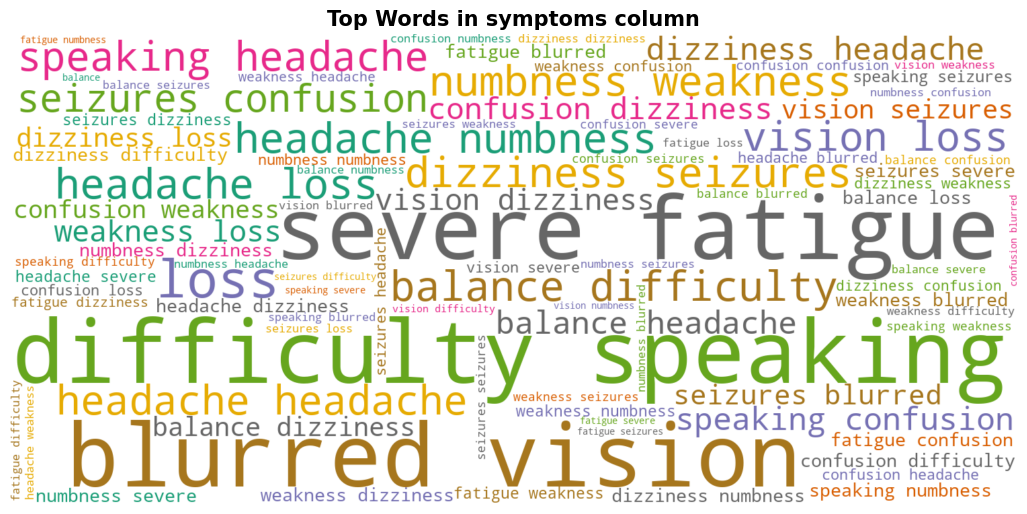

In [34]:
# Importing all the modules that are required for a wordcloud
!pip install wordcloud
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Check for the first columns in symptoms
boyutext = boyu_df.Symptoms[0]

# Filling the na values with "" and making the text to all lowercase
wordcloud = WordCloud().generate(boyutext)
boyu_df["Symptoms"] = boyu_df["Symptoms"].fillna(value="")
word_string=" ".join(boyu_df['Symptoms'].str.lower())

# Editing the word cloud size, background color, max words, font size, width and height
plt.figure(figsize=(13,13))
boyu_wc = WordCloud(background_color="white", stopwords = STOPWORDS, max_words=2000, max_font_size= 400,  width=1500, height=700)
boyu_wc.generate(word_string)

# Editing the word cloud color, random_state enables you to get consistent results,
# interpolation utilized to interpolate functions of any two given variables with the help of linear interpolation,
# adding title, editing the font size of the title and font weight to bold.
plt.imshow(boyu_wc.recolor( colormap= 'Dark2' , random_state=17), interpolation="bilinear")
plt.title(label="Top Words in symptoms column",fontsize=15, weight='bold')

# Removing the axis value for the word cloud
plt.axis("off")

# Displaying the word cloud
plt.show()

The size of each word indicates its frequency or importance; larger words were mentioned more often. This particular word cloud represents the top words found in a ‘symptoms’ column, likely from a health or medical dataset.

Here are some of the prominent words and their possible implications:

- Severe: This could indicate that severe symptoms are common in the dataset.
- Fatigue: Fatigue is a common symptom in many health conditions.
- Blurred Vision: This symptom might suggest conditions related to eye health or neurological conditions.
- Difficulty Speaking: This could be associated with neurological conditions like stroke.
- Headache: A common symptom in various conditions, from minor issues like dehydration to more serious conditions like migraines or brain tumors.
- Other visible words include “loss,” “dizziness,” “numbness,” and “seizures,” which are also symptoms associated with various health conditions.

## Apply Pre-processing steps/techniques in the csv file contents

### Removing Columns for Predictive Modeling for Stroke Risk

In [35]:
# List of columns to be removed
columns_to_remove = ['Patient ID', 'Patient Name', 'Marital Status', 'Work Type', 'Residence Type', 'Symptoms']

# Remove the columns
boyu_df1 = boyu_df.drop(columns=columns_to_remove)

# Display the updated DataFrame
boyu_df1

Age  Gender  Hypertension  Heart Disease  Average Glucose Level  \
0       56    Male             0              1                 130.91   
1       80    Male             0              0                 183.73   
2       26    Male             1              1                 189.00   
3       73    Male             0              0                 185.29   
4       51    Male             1              1                 177.34   
...    ...     ...           ...            ...                    ...   
14995   88  Female             1              1                 160.22   
14996   47  Female             0              0                 107.58   
14997   35    Male             0              0                 134.90   
14998   73    Male             0              0                 169.42   
14999   64  Female             0              0                 186.88   

       Body Mass Index (BMI)    Smoking Status    Alcohol Intake  \
0                      22.37        Non-smoker    Social Drinker   
1                      32.57        Non-smoker             Never   
2                      20.32   Formerly Smoked            Rarely   
3                      27.50        Non-smoker  Frequent Drinker   
4                      29.06  Currently Smokes            Rarely   
...                      ...               ...               ...   
14995                  39.73  Currently Smokes    Social Drinker   
14996                  22.17        Non-smoker             Never   
14997                  26.38        Non-smoker            Rarely   
14998                  28.32        Non-smoker             Never   
14999                  39.30  Currently Smokes            Rarely   

      Physical Activity  Stroke History Family History of Stroke  \
0              Moderate               0                      Yes   
1                   Low               0                       No   
2                  High               0                      Yes   
3              Moderate               0                       No   
4                   Low               0                      Yes   
...                 ...             ...                      ...   
14995              High               0                       No   
14996               Low               1                       No   
14997              High               1                       No   
14998              High               0                      Yes   
14999          Moderate               0                       No   

      Dietary Habits  Stress Levels Blood Pressure Levels Cholesterol Levels  \
0              Vegan           3.48               140/108  HDL: 68, LDL: 133   
1              Paleo           1.73                146/91   HDL: 63, LDL: 70   
2              Paleo           7.31                154/97   HDL: 59, LDL: 95   
3              Paleo           5.35                174/81  HDL: 70, LDL: 137   
4        Pescatarian           6.84                121/95   HDL: 65, LDL: 68   
...              ...            ...                   ...                ...   
14995          Paleo           1.12                171/92  HDL: 44, LDL: 153   
14996    Gluten-Free           1.47                155/71  HDL: 35, LDL: 183   
14997          Paleo           0.51               121/110  HDL: 57, LDL: 159   
14998          Paleo           1.53                157/74   HDL: 79, LDL: 91   
14999          Vegan           4.57                133/81  HDL: 78, LDL: 179   

       Diagnosis  
0         Stroke  
1         Stroke  
2         Stroke  
3      No Stroke  
4         Stroke  
...          ...  
14995  No Stroke  
14996  No Stroke  
14997     Stroke  
14998  No Stroke  
14999     Stroke  

[15000 rows x 16 columns]

### Reason for removing the columns
- Patient ID and Patient Name:

Reason for Removal:

- These columns typically serve as unique identifiers for each patient. However, they do not contain information directly related to the health status or factors contributing to stroke risk. Including them in the predictive model might lead the model to falsely associate certain patterns with specific patients rather than identifying genuine predictive features for stroke.

Potential Issues:

- Patient identifiers might introduce noise or overfitting if the model attempts to learn patterns specific to individual patients that are not generalizable to new data.
  
- Models could mistakenly associate the presence or absence of strokes with specific patients rather than underlying health factors.

- Marital Status, Work Type, Residence Type, Symptoms:

Reason for Potential Retention:

- These columns contain categorical information related to a patient's lifestyle and socio-economic factors, which could influence health outcomes, including stroke risk.

- They might have predictive power if certain categories are associated with a higher or lower likelihood of stroke

### Check for the new dataframe columns

In [36]:
# Checking the columns 
boyu_df1.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Diagnosis'],
      dtype='object')

In [37]:
# Check number of columns
print("Number of Columns:" ,len(boyu_df1.columns))

Number of Columns: 16


### Checking for any blank values

In [38]:
# Importantly, this code is checking for the presence of any null (missing) values in each column of the 'boyu_df1' DataFrame.
print(boyu_df1.isnull().any(axis=0))

Age                         False
Gender                      False
Hypertension                False
Heart Disease               False
Average Glucose Level       False
Body Mass Index (BMI)       False
Smoking Status              False
Alcohol Intake              False
Physical Activity           False
Stroke History              False
Family History of Stroke    False
Dietary Habits              False
Stress Levels               False
Blood Pressure Levels       False
Cholesterol Levels          False
Diagnosis                   False
dtype: bool


### Check for missing values

In [39]:
# Check if there are any missing values
boyu_df1.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Diagnosis                   0
dtype: int64

### Check for any duplicates values

In [40]:
# Check for duplicated rows in the DataFrame 'df' and calculate the sum of duplicates.
# The method 'duplicated()' identifies rows that are identical to previous rows,
# returning a boolean Series where 'True' indicates a duplicated row.
# The 'sum()' function then counts the number of 'True' values, providing the total count
# of duplicated rows in the DataFrame.
boyu_df1.duplicated().sum()

0

### Preprocessing Cardiovascular Health Data: Splitting Blood Pressure and Cholesterol Levels, Numeric Conversion, and Column Removal

In [41]:
# Split the 'Blood Pressure Levels' column into two new columns
boyu_df1[['Systolic_BP', 'Diastolic_BP']] = boyu_df1['Blood Pressure Levels'].str.split('/', expand=True)

# Convert the new columns to numeric type
boyu_df1['Systolic_BP'] = pd.to_numeric(boyu_df1['Systolic_BP'])
boyu_df1['Diastolic_BP'] = pd.to_numeric(boyu_df1['Diastolic_BP'])

# Split the 'Cholesterol Levels' column into two new columns
boyu_df1[['HDL', 'LDL']] = boyu_df1['Cholesterol Levels'].str.split(',', expand=True)

# Remove the 'HDL: ' and 'LDL: ' prefixes
boyu_df1['HDL'] = boyu_df1['HDL'].str.replace('HDL: ', '')
boyu_df1['LDL'] = boyu_df1['LDL'].str.replace('LDL: ', '')

# Convert the new columns to numeric type
boyu_df1['HDL'] = pd.to_numeric(boyu_df1['HDL'])
boyu_df1['LDL'] = pd.to_numeric(boyu_df1['LDL'])

# Create a new dataframe boyu_df3 after dropping the original columns
boyu_df2 = boyu_df1.drop(['Blood Pressure Levels', 'Cholesterol Levels'], axis=1)

# Display the DataFrame to verify the changes.
boyu_df2  

Age  Gender  Hypertension  Heart Disease  Average Glucose Level  \
0       56    Male             0              1                 130.91   
1       80    Male             0              0                 183.73   
2       26    Male             1              1                 189.00   
3       73    Male             0              0                 185.29   
4       51    Male             1              1                 177.34   
...    ...     ...           ...            ...                    ...   
14995   88  Female             1              1                 160.22   
14996   47  Female             0              0                 107.58   
14997   35    Male             0              0                 134.90   
14998   73    Male             0              0                 169.42   
14999   64  Female             0              0                 186.88   

       Body Mass Index (BMI)    Smoking Status    Alcohol Intake  \
0                      22.37        Non-smoker    Social Drinker   
1                      32.57        Non-smoker             Never   
2                      20.32   Formerly Smoked            Rarely   
3                      27.50        Non-smoker  Frequent Drinker   
4                      29.06  Currently Smokes            Rarely   
...                      ...               ...               ...   
14995                  39.73  Currently Smokes    Social Drinker   
14996                  22.17        Non-smoker             Never   
14997                  26.38        Non-smoker            Rarely   
14998                  28.32        Non-smoker             Never   
14999                  39.30  Currently Smokes            Rarely   

      Physical Activity  Stroke History Family History of Stroke  \
0              Moderate               0                      Yes   
1                   Low               0                       No   
2                  High               0                      Yes   
3              Moderate               0                       No   
4                   Low               0                      Yes   
...                 ...             ...                      ...   
14995              High               0                       No   
14996               Low               1                       No   
14997              High               1                       No   
14998              High               0                      Yes   
14999          Moderate               0                       No   

      Dietary Habits  Stress Levels  Diagnosis  Systolic_BP  Diastolic_BP  \
0              Vegan           3.48     Stroke          140           108   
1              Paleo           1.73     Stroke          146            91   
2              Paleo           7.31     Stroke          154            97   
3              Paleo           5.35  No Stroke          174            81   
4        Pescatarian           6.84     Stroke          121            95   
...              ...            ...        ...          ...           ...   
14995          Paleo           1.12  No Stroke          171            92   
14996    Gluten-Free           1.47  No Stroke          155            71   
14997          Paleo           0.51     Stroke          121           110   
14998          Paleo           1.53  No Stroke          157            74   
14999          Vegan           4.57     Stroke          133            81   

       HDL  LDL  
0       68  133  
1       63   70  
2       59   95  
3       70  137  
4       65   68  
...    ...  ...  
14995   44  153  
14996   35  183  
14997   57  159  
14998   79   91  
14999   78  179  

[15000 rows x 18 columns]

#### Reason for Splitting Blood Pressure and Cholesterol Levels:

- The 'Blood Pressure Levels' column is split into two new columns, 'Systolic_BP' and 'Diastolic_BP,' to separate the systolic and diastolic components. This separation allows for a more precise analysis of each component's impact on cardiovascular health.
Converting to Numeric Type:

- The newly created 'Systolic_BP' and 'Diastolic_BP' columns are converted to numeric types. This conversion is crucial for mathematical operations and ensures that the values are treated as numerical data, a requirement for building predictive models.
Splitting Cholesterol Levels and Removing Prefixes:

- Similar to the blood pressure data, the 'Cholesterol Levels' column is split into 'HDL' and 'LDL' columns. Additionally, prefixes ('HDL: ' and 'LDL: ') are removed from the values for clean data representation. This separation enables a detailed examination of the impact of HDL and LDL cholesterol levels on cardiovascular health.


Converting Cholesterol Levels to Numeric Type:

- The 'HDL' and 'LDL' columns are converted to numeric types, ensuring cholesterol levels are treated as numerical features in the predictive models.

Creating a New DataFrame (boyu_df2):

- A new DataFrame, 'boyu_df2,' is created after splitting and converting columns. This data frame excludes the original 'Blood Pressure Levels' and 'Cholesterol Levels' columns. Removing these columns simplifies the dataset while retaining the essential information required for predictive modelling.


Verification and Display:

- The final step involves displaying the modified data fram to verify that the preprocessing steps were executed correctly. This allows for visual confirmation and ensures that the dataset is ready for further analysis and the construction of predictive models.

- These preprocessing steps enhance the dataset's suitability for predictive modelling by organizing and converting relevant features, providing a cleaner and more structured input for the subsequent modelling phase.

### Rearranging the columns in my dataframe 

In [42]:
# Get a list of all the columns
cols = list(boyu_df2.columns)

# Move the 'Diagnosis' column to the end
cols.insert(len(cols), cols.pop(cols.index('Diagnosis')))

# Reorder the dataframe
boyu_df3 = boyu_df2.loc[:, cols]

# Display the DataFrame to verify the changes.
boyu_df3

Age  Gender  Hypertension  Heart Disease  Average Glucose Level  \
0       56    Male             0              1                 130.91   
1       80    Male             0              0                 183.73   
2       26    Male             1              1                 189.00   
3       73    Male             0              0                 185.29   
4       51    Male             1              1                 177.34   
...    ...     ...           ...            ...                    ...   
14995   88  Female             1              1                 160.22   
14996   47  Female             0              0                 107.58   
14997   35    Male             0              0                 134.90   
14998   73    Male             0              0                 169.42   
14999   64  Female             0              0                 186.88   

       Body Mass Index (BMI)    Smoking Status    Alcohol Intake  \
0                      22.37        Non-smoker    Social Drinker   
1                      32.57        Non-smoker             Never   
2                      20.32   Formerly Smoked            Rarely   
3                      27.50        Non-smoker  Frequent Drinker   
4                      29.06  Currently Smokes            Rarely   
...                      ...               ...               ...   
14995                  39.73  Currently Smokes    Social Drinker   
14996                  22.17        Non-smoker             Never   
14997                  26.38        Non-smoker            Rarely   
14998                  28.32        Non-smoker             Never   
14999                  39.30  Currently Smokes            Rarely   

      Physical Activity  Stroke History Family History of Stroke  \
0              Moderate               0                      Yes   
1                   Low               0                       No   
2                  High               0                      Yes   
3              Moderate               0                       No   
4                   Low               0                      Yes   
...                 ...             ...                      ...   
14995              High               0                       No   
14996               Low               1                       No   
14997              High               1                       No   
14998              High               0                      Yes   
14999          Moderate               0                       No   

      Dietary Habits  Stress Levels  Systolic_BP  Diastolic_BP  HDL  LDL  \
0              Vegan           3.48          140           108   68  133   
1              Paleo           1.73          146            91   63   70   
2              Paleo           7.31          154            97   59   95   
3              Paleo           5.35          174            81   70  137   
4        Pescatarian           6.84          121            95   65   68   
...              ...            ...          ...           ...  ...  ...   
14995          Paleo           1.12          171            92   44  153   
14996    Gluten-Free           1.47          155            71   35  183   
14997          Paleo           0.51          121           110   57  159   
14998          Paleo           1.53          157            74   79   91   
14999          Vegan           4.57          133            81   78  179   

       Diagnosis  
0         Stroke  
1         Stroke  
2         Stroke  
3      No Stroke  
4         Stroke  
...          ...  
14995  No Stroke  
14996  No Stroke  
14997     Stroke  
14998  No Stroke  
14999     Stroke  

[15000 rows x 18 columns]

### Data Modelling

#### Comparison of Counts Between Male and Female Categories

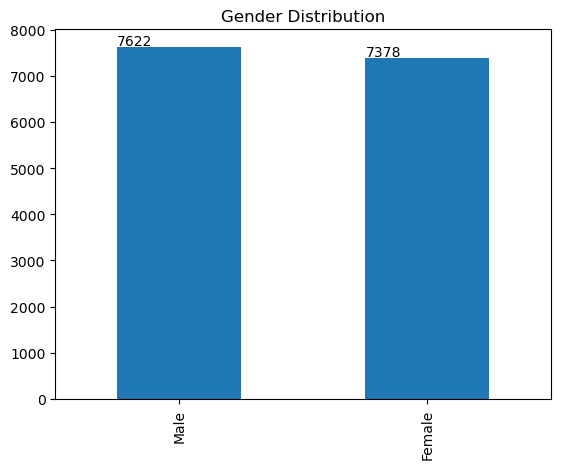

In [43]:
# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the bar chart
ax = boyu_df3['Gender'].value_counts().plot(kind='bar')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Add a title
plt.title('Gender Distribution')

# Display the plot
plt.show()

This is a bar chart that compares the counts of two categories: “Male” and “Female”. The y-axis represents the count, ranging from 0 to 8000. The “Male” category has a count of 7622, while the “Female” category has a count of 7378.

### Distribution of Hypertension in the Dataset

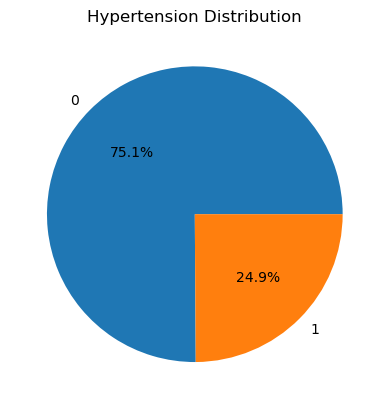

In [44]:
# Get value counts of the 'Hypertension' column
heart_disease_counts = boyu_df3['Hypertension'].value_counts()

# Create a pie chart
heart_disease_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='')

# Add a title
plt.title('Hypertension Distribution')

# Display the plot
plt.show()

The larger segment, labeled with “0”, represents 75.1% of the data. This could indicate the percentage of individuals in your dataset who do not have hypertension.

The smaller segment, labeled with “1”, represents 24.9% of the data. This could indicate the percentage of individuals in your dataset who have hypertension.

### Distribution of Heart Disease in the Dataset

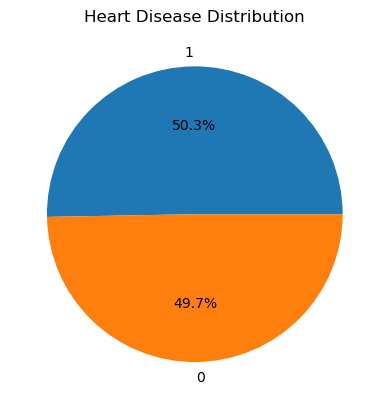

In [45]:
# Get value counts of the 'Smoking Status' column
heart_disease_counts = boyu_df3['Heart Disease'].value_counts()

# Create a pie chart
heart_disease_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='')

# Add a title
plt.title('Heart Disease Distribution')

# Display the plot
plt.show()

The segment labeled with “1”, represents 50.3% of the data. This could indicate the percentage of individuals in your dataset who have heart disease.

The segment labeled with “0”, represents 49.7% of the data. This could indicate the percentage of individuals in your dataset who do not have heart disease.

### Histogram of Average Glucose Level 

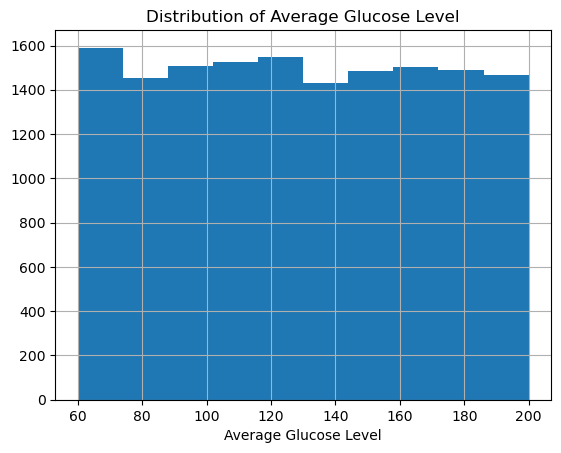

In [46]:
# Histogram of 'Average Glucose Level' to understand its distribution
boyu_df3['Average Glucose Level'].hist()

# Add a title
plt.title('Distribution of Average Glucose Level')

# Add x-axis label
plt.xlabel('Average Glucose Level')

# Display the plot
plt.show()

In this histogram:

- The x-axis ranges from 60 to 200, representing the values of some variable.
- The y-axis ranges from 0 to 1600, indicating the frequency count of each bin.
- Each bar represents the count of data points that fall into its respective bin.

The distribution of data appears to increase in frequency as the value on the x-axis increases until it reaches a peak, and then it decreases slightly. This suggests that the data might be normally distributed with a slight right skew.

### Distribution of Smoking Status in the Dataset

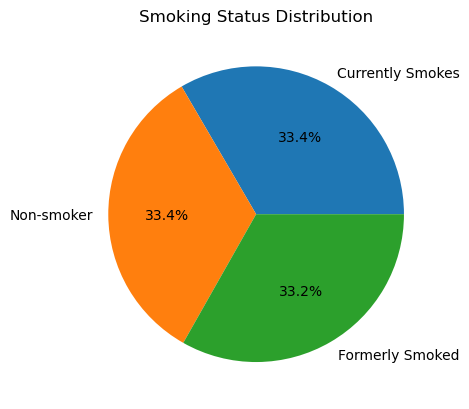

In [47]:
# Get value counts of the 'Smoking Status' column
smoking_status_counts = boyu_df3['Smoking Status'].value_counts()

# Create a pie chart
smoking_status_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='')

# Add a title
plt.title('Smoking Status Distribution')

# Display the plot
plt.show()

Non-smoker (33.4%): The orange segment represents individuals who do not smoke.

Currently Smokes (33.4%): The blue segment represents individuals who currently smoke.

Formerly Smoked (33.2%): The green segment represents individuals who used to smoke but don’t anymore.

### Feature Engineering

#### One Hot Encoding of replacing categorical columns values to numerical values

In [48]:
# Categorical columns
cat_cols = ['Gender', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits']

# Perform one-hot encoding
boyu_df4 = pd.get_dummies(boyu_df3, columns=cat_cols)

# Display the DataFrame
boyu_df4

Age  Hypertension  Heart Disease  Average Glucose Level  \
0       56             0              1                 130.91   
1       80             0              0                 183.73   
2       26             1              1                 189.00   
3       73             0              0                 185.29   
4       51             1              1                 177.34   
...    ...           ...            ...                    ...   
14995   88             1              1                 160.22   
14996   47             0              0                 107.58   
14997   35             0              0                 134.90   
14998   73             0              0                 169.42   
14999   64             0              0                 186.88   

       Body Mass Index (BMI)  Stroke History  Stress Levels  Systolic_BP  \
0                      22.37               0           3.48          140   
1                      32.57               0           1.73          146   
2                      20.32               0           7.31          154   
3                      27.50               0           5.35          174   
4                      29.06               0           6.84          121   
...                      ...             ...            ...          ...   
14995                  39.73               0           1.12          171   
14996                  22.17               1           1.47          155   
14997                  26.38               1           0.51          121   
14998                  28.32               0           1.53          157   
14999                  39.30               0           4.57          133   

       Diastolic_BP  HDL  ...  Physical Activity_Moderate  \
0               108   68  ...                           1   
1                91   63  ...                           0   
2                97   59  ...                           0   
3                81   70  ...                           1   
4                95   65  ...                           0   
...             ...  ...  ...                         ...   
14995            92   44  ...                           0   
14996            71   35  ...                           0   
14997           110   57  ...                           0   
14998            74   79  ...                           0   
14999            81   78  ...                           1   

      Family History of Stroke_No  Family History of Stroke_Yes  \
0                               0                             1   
1                               1                             0   
2                               0                             1   
3                               1                             0   
4                               0                             1   
...                           ...                           ...   
14995                           1                             0   
14996                           1                             0   
14997                           1                             0   
14998                           0                             1   
14999                           1                             0   

       Dietary Habits_Gluten-Free  Dietary Habits_Keto  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   
...                           ...                  ...   
14995                           0                    0   
14996                           1                    0   
14997                           0                    0   
14998                           0                    0   
14999                           0                    0   

       Dietary Habits_Non-Vegetarian  Dietary Habits_Paleo  \
0   

Based on the result above, all of the categorical columns values has been converted to numerical values

### Converting Categorical Diagnosis to Numerical Values

In [49]:
# Define a dictionary for the replacements
replace_dict = {'Diagnosis': {'Stroke': 1, 'No Stroke': 0}}

# Use the replace() function
boyu_df4 = boyu_df4.replace(replace_dict)

# Display the DataFrame
boyu_df4

Age  Hypertension  Heart Disease  Average Glucose Level  \
0       56             0              1                 130.91   
1       80             0              0                 183.73   
2       26             1              1                 189.00   
3       73             0              0                 185.29   
4       51             1              1                 177.34   
...    ...           ...            ...                    ...   
14995   88             1              1                 160.22   
14996   47             0              0                 107.58   
14997   35             0              0                 134.90   
14998   73             0              0                 169.42   
14999   64             0              0                 186.88   

       Body Mass Index (BMI)  Stroke History  Stress Levels  Systolic_BP  \
0                      22.37               0           3.48          140   
1                      32.57               0           1.73          146   
2                      20.32               0           7.31          154   
3                      27.50               0           5.35          174   
4                      29.06               0           6.84          121   
...                      ...             ...            ...          ...   
14995                  39.73               0           1.12          171   
14996                  22.17               1           1.47          155   
14997                  26.38               1           0.51          121   
14998                  28.32               0           1.53          157   
14999                  39.30               0           4.57          133   

       Diastolic_BP  HDL  ...  Physical Activity_Moderate  \
0               108   68  ...                           1   
1                91   63  ...                           0   
2                97   59  ...                           0   
3                81   70  ...                           1   
4                95   65  ...                           0   
...             ...  ...  ...                         ...   
14995            92   44  ...                           0   
14996            71   35  ...                           0   
14997           110   57  ...                           0   
14998            74   79  ...                           0   
14999            81   78  ...                           1   

       Family History of Stroke_No  Family History of Stroke_Yes  \
0                                0                             1   
1                                1                             0   
2                                0                             1   
3                                1                             0   
4                                0                             1   
...                            ...                           ...   
14995                            1                             0   
14996                            1                             0   
14997                            1                             0   
14998                            0                             1   
14999                            1                             0   

       Dietary Habits_Gluten-Free  Dietary Habits_Keto  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   
...                           ...                  ...   
14995                           0                    0   
14996                           1                    0   
14997                           0                    0   
14998                           0                    0   
14999                           0                    0   

       Dietary Habits_Non-Vegetarian  Dietary Habits_P

Stroke Column: 1 mean Stroke and 0 mean No Stroke

### Changing the data type for prediction

In [50]:
# The 'info()' method is used to display a concise summary of the 'boyu_df4' DataFrame.

# It provides information such as the total number of non-null entries in each column,
# the data type of each column, and the memory usage of the DataFrame.

# This summary is helpful for quickly understanding the structure and characteristics of the DataFrame.
boyu_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              15000 non-null  int64  
 1   Hypertension                     15000 non-null  int64  
 2   Heart Disease                    15000 non-null  int64  
 3   Average Glucose Level            15000 non-null  float64
 4   Body Mass Index (BMI)            15000 non-null  float64
 5   Stroke History                   15000 non-null  int64  
 6   Stress Levels                    15000 non-null  float64
 7   Systolic_BP                      15000 non-null  int64  
 8   Diastolic_BP                     15000 non-null  int64  
 9   HDL                              15000 non-null  int64  
 10  LDL                              15000 non-null  int64  
 11  Diagnosis                        15000 non-null  int64  
 12  Gender_Female     

In [51]:
# List of columns to change
cols_to_change = ['Gender_Female', 'Gender_Male', 'Smoking Status_Currently Smokes', 'Smoking Status_Formerly Smoked', 
                  'Smoking Status_Non-smoker', 'Alcohol Intake_Frequent Drinker', 'Alcohol Intake_Never', 'Alcohol Intake_Rarely', 
                  'Alcohol Intake_Social Drinker', 'Physical Activity_High', 'Physical Activity_Low', 'Physical Activity_Moderate',
                  'Family History of Stroke_No', 'Family History of Stroke_Yes', 'Dietary Habits_Gluten-Free', 'Dietary Habits_Keto',
                  'Dietary Habits_Non-Vegetarian', 'Dietary Habits_Paleo', 'Dietary Habits_Pescatarian', 'Dietary Habits_Vegan', 
                  'Dietary Habits_Vegetarian']

# Change data type of these columns to float64
boyu_df4[cols_to_change] = boyu_df4[cols_to_change].astype('float64')

In [52]:
# The 'info()' method is used to display a concise summary of the 'boyu_df4' DataFrame.

# It provides information such as the total number of non-null entries in each column,
# the data type of each column, and the memory usage of the DataFrame.

# This summary is helpful for quickly understanding the structure and characteristics of the DataFrame.
boyu_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              15000 non-null  int64  
 1   Hypertension                     15000 non-null  int64  
 2   Heart Disease                    15000 non-null  int64  
 3   Average Glucose Level            15000 non-null  float64
 4   Body Mass Index (BMI)            15000 non-null  float64
 5   Stroke History                   15000 non-null  int64  
 6   Stress Levels                    15000 non-null  float64
 7   Systolic_BP                      15000 non-null  int64  
 8   Diastolic_BP                     15000 non-null  int64  
 9   HDL                              15000 non-null  int64  
 10  LDL                              15000 non-null  int64  
 11  Diagnosis                        15000 non-null  int64  
 12  Gender_Female     

### Feature Selection

In [53]:
# Calculate the correlation matrix
corr_matrix = boyu_df4.corr()

# Print the correlation of each feature with 'Diagnosis'
print(corr_matrix['Diagnosis'].sort_values(ascending=False))

Diagnosis                          1.000000
Average Glucose Level              0.015627
Alcohol Intake_Rarely              0.012440
Dietary Habits_Paleo               0.010069
Family History of Stroke_No        0.009282
Dietary Habits_Keto                0.007653
Smoking Status_Currently Smokes    0.005142
Diastolic_BP                       0.003053
Physical Activity_Low              0.002991
Smoking Status_Non-smoker          0.002597
LDL                                0.002560
Heart Disease                      0.001892
Physical Activity_Moderate         0.001885
Gender_Male                        0.001136
Dietary Habits_Vegan               0.000817
Alcohol Intake_Social Drinker     -0.000773
Gender_Female                     -0.001136
Dietary Habits_Gluten-Free        -0.001388
Dietary Habits_Non-Vegetarian     -0.001686
Age                               -0.002060
Alcohol Intake_Frequent Drinker   -0.003585
Physical Activity_High            -0.004852
Systolic_BP                     

- Diagnosis: This is the target variable I am predicting. It has a perfect correlation of 1 with itself.

- Average Glucose Level: This feature has a positive correlation of 0.015627 with the Diagnosis, indicating a slight positive linear relationship.

- -Alcohol Intake_Rarely: This dummy variable has a positive correlation of 0.012440 with the Diagnosis.

- Dietary Habits_Paleo: This dummy variable has a positive correlation of 0.010269 with the Diagnosis.

- Family History of Stroke_No: This dummy variable has a positive correlation of 0.009282 with the Diagnosis.

- Age: This feature has a negative correlation of -0.020606 with the Diagnosis, indicating a slight negative linear relationship.

- Alcohol Intake_Frequent Drinker: This dummy variable has a negative correlation of -0.038585 with the Diagnosis.

- Physical Activity_High: This dummy variable has a negative correlation of -0.048452 with the Diagnosis.

- Systolic_BP: This feature has a negative correlation of -0.06149 with the Diagnosis.

A positive correlation means that as one feature increases, the other also tends to increase, and vice versa for decrease. A negative correlation means that as one feature increases, the other decreases, and vice versa.

### Rechecking for any null values before model prediction

In [54]:
# Importantly, this code is checking for the presence of any null (missing) values in each column of the 'boyu_df4' DataFrame.
print(boyu_df4.isnull().any(axis=0))

Age                                False
Hypertension                       False
Heart Disease                      False
Average Glucose Level              False
Body Mass Index (BMI)              False
Stroke History                     False
Stress Levels                      False
Systolic_BP                        False
Diastolic_BP                       False
HDL                                False
LDL                                False
Diagnosis                          False
Gender_Female                      False
Gender_Male                        False
Smoking Status_Currently Smokes    False
Smoking Status_Formerly Smoked     False
Smoking Status_Non-smoker          False
Alcohol Intake_Frequent Drinker    False
Alcohol Intake_Never               False
Alcohol Intake_Rarely              False
Alcohol Intake_Social Drinker      False
Physical Activity_High             False
Physical Activity_Low              False
Physical Activity_Moderate         False
Family History o

### Check the distribution of my features

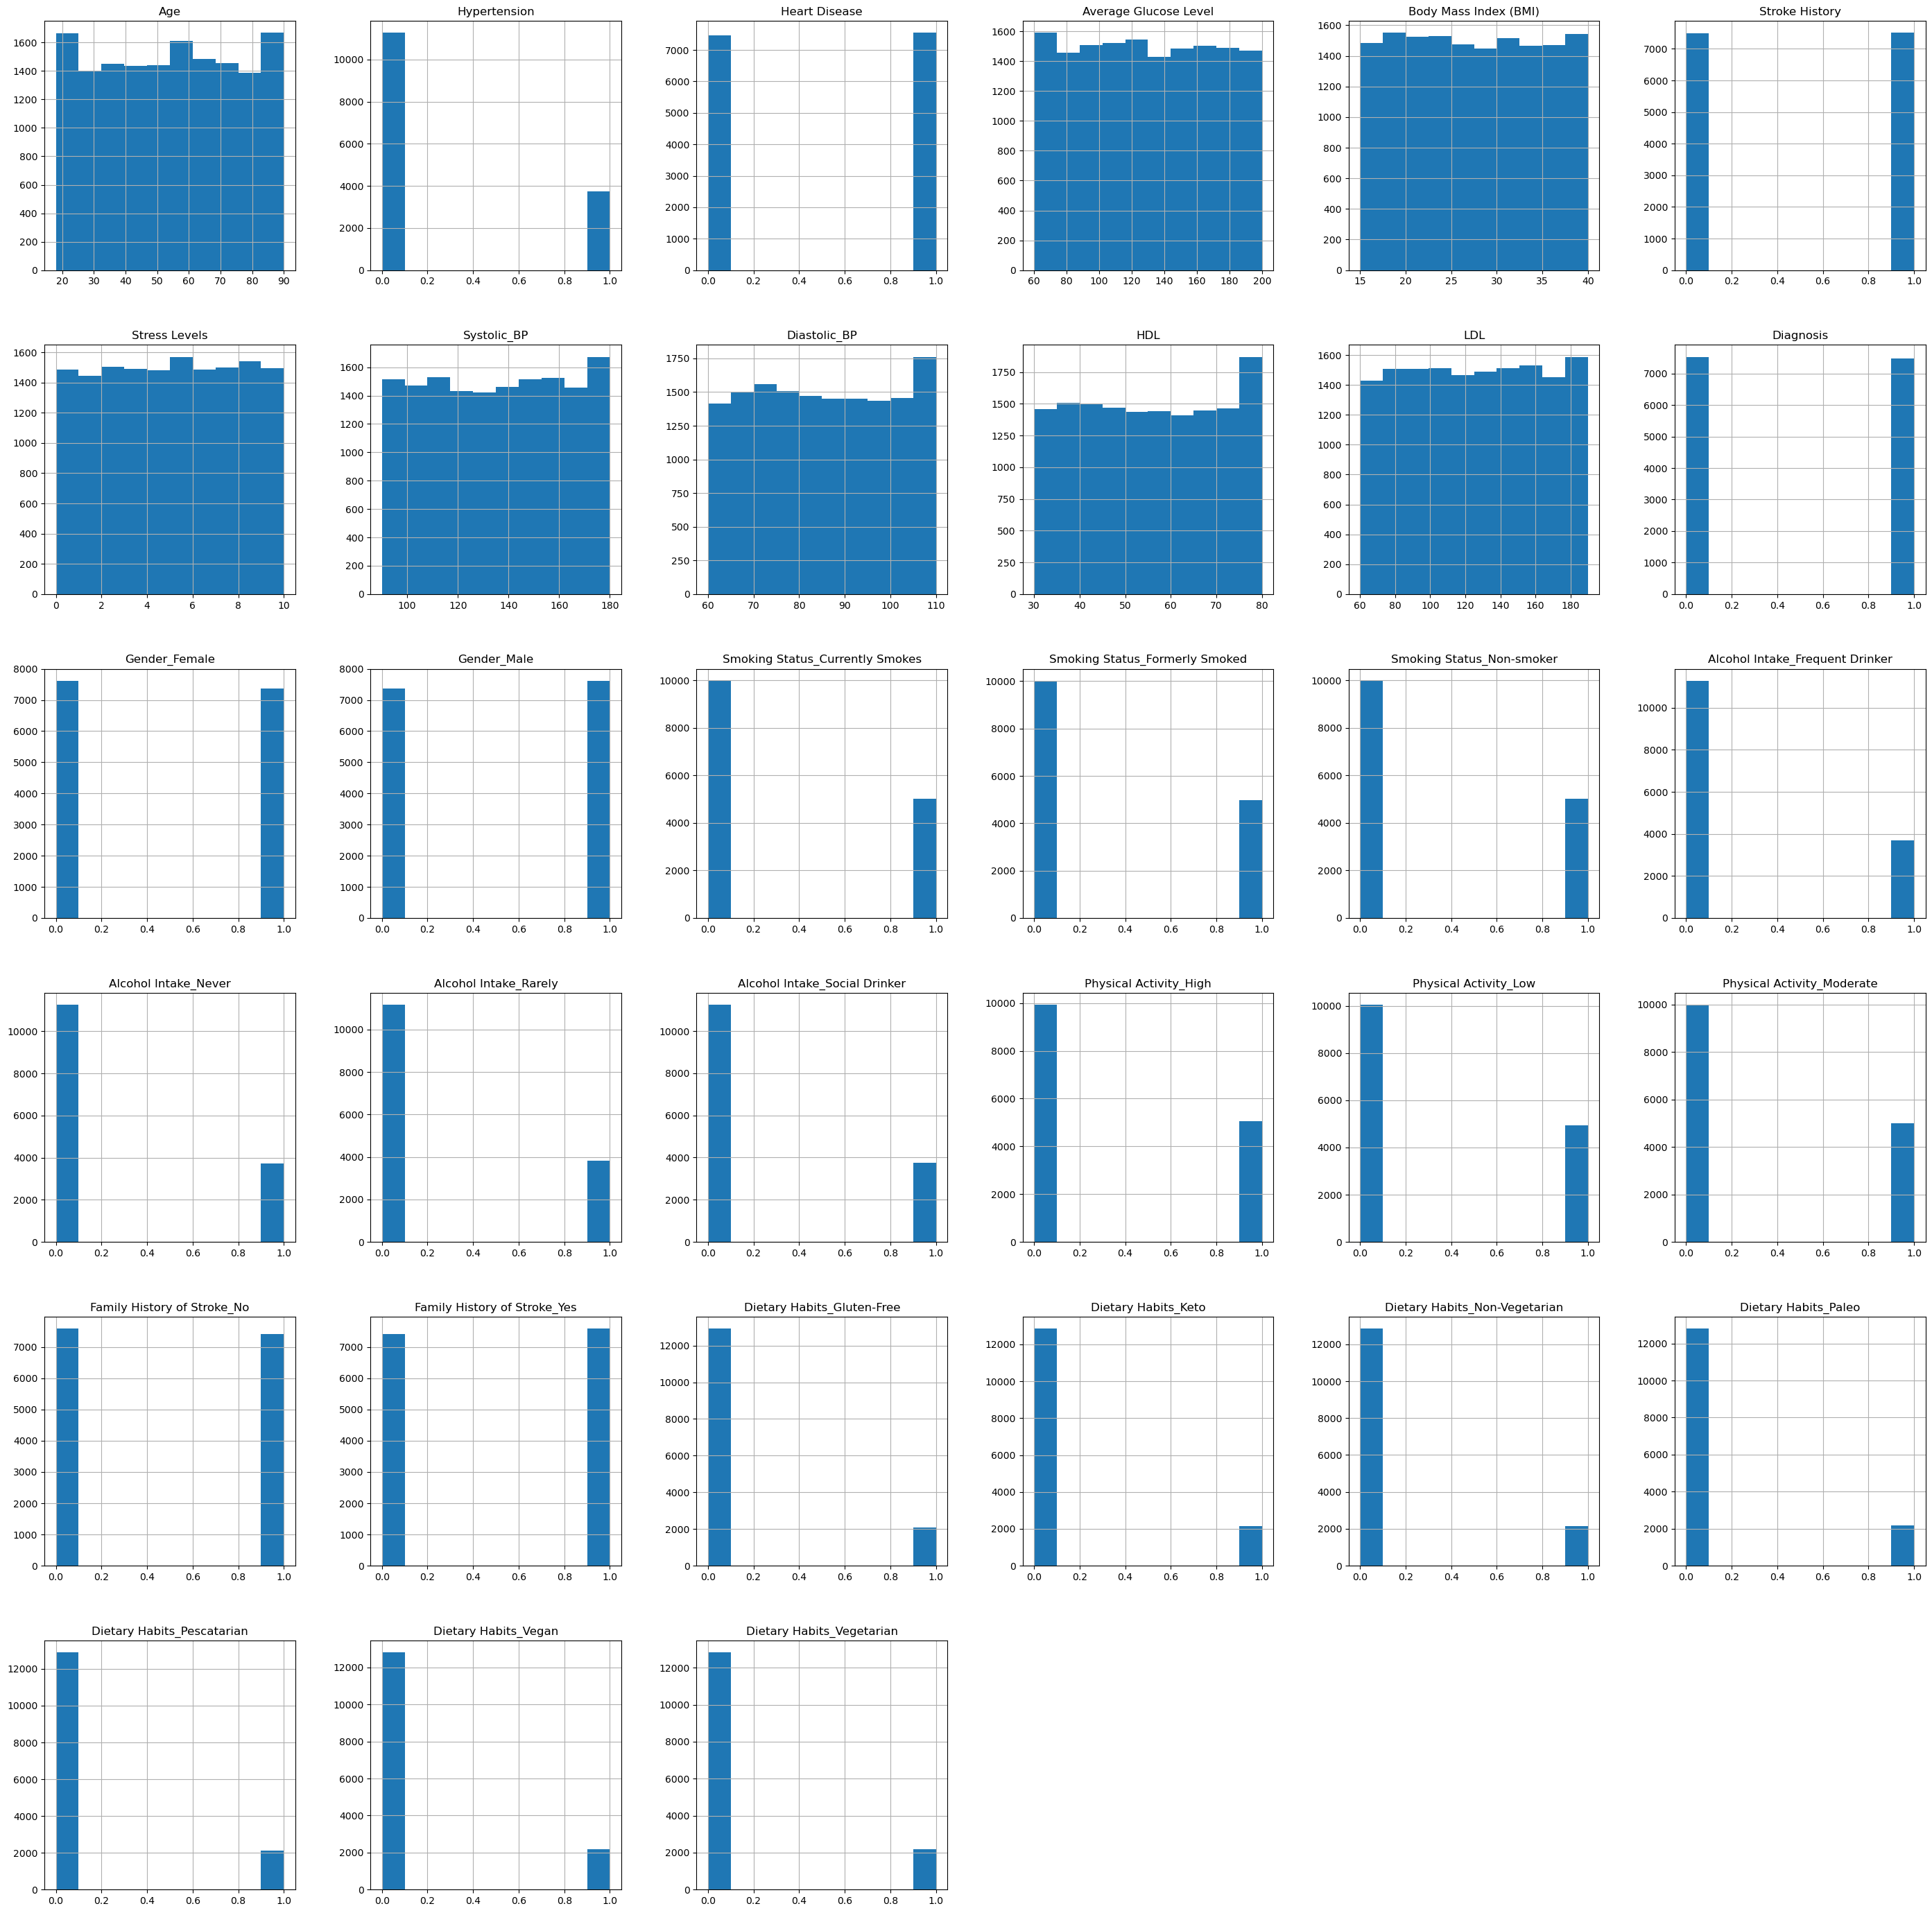

In [55]:
# Check the distribution of my features
boyu_df4.hist(figsize=(35,35))
plt.show()

- Age: This histogram shows the distribution of ages in the dataset. Each bar represents a different age group, and the height of the bar indicates the number of individuals in that age group.

- Hypertension and Heart Disease: These histograms are binary, indicating whether individuals in the dataset have (1) or do not have (0) these conditions.

- Average Glucose Level: This histogram shows a more continuous distribution, indicating that glucose levels vary more widely among individuals in the dataset.

- Body Mass Index (BMI): This histogram also shows a continuous distribution, but it appears to be less varied than the glucose level distribution.

- Stroke History: This histogram is binary like Hypertension and Heart Disease but has an imbalanced distribution, indicating that there are more data for one category (either individuals who have had a stroke or those who haven’t).

### Write Dataframe to CSV File

In [56]:
# Converting to csv file
boyu_df4.to_csv('cleaned_stroke_prediction.csv')

## Model Training

### Splitting Data into Training and Testing Sets for Stroke Prediction

In [57]:
from sklearn.model_selection import train_test_split

# Features
X = boyu_df4.drop('Diagnosis', axis=1)

# Target variable
y = boyu_df4['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the size of original, test, training dataset
print("The size of original dataset:" ,X.shape)
print("The size of training dataset:" ,X_train.shape)
print("The size of test dataset:" , X_test.shape)

The size of original dataset: (15000, 32)
The size of training dataset: (12000, 32)
The size of test dataset: (3000, 32)


### Summary of the model prediction scores

In [58]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a list to store different models
boyu_models = []

# Append tuples containing model name and corresponding classifier to the list
boyu_models.append(("LR", LogisticRegression(solver='liblinear', random_state=123)))
boyu_models.append(("DT", DecisionTreeClassifier(random_state=123)))
boyu_models.append(("RF", RandomForestClassifier(n_estimators=100, random_state=123)))
boyu_models.append(("SVM", SVC(gamma='auto', random_state=123)))
boyu_models.append(("KNN", KNeighborsClassifier()))
boyu_models.append(("GNB", GaussianNB()))
boyu_models.append(("AB", AdaBoostClassifier(random_state=123)))

# Create empty lists to store model names, training scores, and validation scores
boyu_names = []
boyu_scores = []
boyu_scores2 = []

# Loop through each model in the list
for boyu_name, boyu_model in boyu_models:
    # Fit the model on the training data
    boyu_model.fit(X_train, y_train)
    
    # Make predictions on the training and validation sets
    y_pred = boyu_model.predict(X_train)
    y_pred2 = boyu_model.predict(X_test)
    
    # Calculate accuracy scores for training and validation sets
    boyu_scores.append(accuracy_score(y_train, y_pred))
    boyu_scores2.append(accuracy_score(y_test, y_pred2))
    
    # Store the model name
    boyu_names.append(boyu_name)

# Create a DataFrame to compare the performance of different models
boyu_models_compare = pd.DataFrame({"Model Name": boyu_names, "Score on Training": boyu_scores, "Score on Validation": boyu_scores2})

# Display the DataFrame
boyu_models_compare

C:\Users\boyuc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Name  Score on Training  Score on Validation
0         LR           0.518417             0.510000
1         DT           1.000000             0.494000
2         RF           1.000000             0.486000
3        SVM           1.000000             0.490333
4        KNN           0.693583             0.502667
5        GNB           0.516167             0.508333
6         AB           0.548167             0.520000

Absolutely, here's a similar analysis for all the models based on the image you provided:

- **Logistic Regression (LR)**:

    Training Score: 0.518417
    Validation Score: 0.510000

    Pros:
    Logistic Regression is a simple and fast model, which can provide insights into the impact of each feature.

    Considerations:
    The model shows moderate performance on both training and validation sets.

- **Decision Tree (DT)**:

    Training Score: 1.000000
    Validation Score: 0.494000

    Pros:
    Decision Trees can capture complex relationships in the data.

    Considerations:
    Overfitting is evident as the model perfectly fits the training data but doesn't generalize well to the validation set.

- **Random Forest (RF)**:

    Training Score: 1.000000
    Validation Score: 0.486000

    Pros:
    Random Forest addresses Decision Tree overfitting by combining multiple trees.

    Considerations:
    Despite perfect training score, the model doesn't perform as well on the validation set.

- **Support Vector Machine (SVM)**:

    Training Score: 1.000000
    Validation Score: 0.490333

    Pros:
    SVM can capture complex relationships in high-dimensional spaces.

    Considerations:
    The model performs poorly on the validation set, indicating overfitting.

- **K-Nearest Neighbors (KNN)**:

    Training Score: 0.695383
    Validation Score: 0.502667

    Pros:
    KNN can capture local patterns in the data and does not make any assumptions about the data distribution.

    Considerations:
    The model shows good performance on the training set but slightly lower performance on the validation set.

- **Gaussian Naive Bayes (GNB)**:

    Training Score: 0.516167
    Validation Score: 0.508333

    Pros:
    GNB is computationally efficient and handles categorical features well.

    Considerations:
    The model shows moderate performance on both training and validation sets.

- **AdaBoost (AB)**:

    Training Score: 0.548167
    Validation Score: 0.520000

    Pros:
    AdaBoost combines weak learners to create a strong model and often provides good generalization.

    Considerations:
    The model shon the provided scores. The final selection of models should also consider other

### Choose the 4 suitable models

- **Logistic Regression (LR)**:

    Training Score: 0.518417
    Validation Score: 0.510000

Reasoning: LR is interpretable and can provide insights into the impact of each feature. It performs moderately well on both the training and validation sets. Its interpretability may provide insights into factors influencing stroke prediction.

- **K-Nearest Neighbors (KNN)**:

    Training Score: 0.695383
    Validation Score: 0.502667

Reasoning: KNN can capture local patterns in the data and does not make any assumptions about the data distribution. It shows good performance on the training set but slightly lower performance on the validation set. It might be effective if there are localized clusters of patients with similar health and lifestyle factors.

- **Gaussian Naive Bayes (GNB)**:

    Training Score: 0.516167
    Validation Score: 0.508333

Reasoning: GNB is computationally efficient and handles categorical features well. It shows moderate performance on both training and validation sets. It might be suitable for handling the categorical features in your dataset.

- **AdaBoost (AB)**:

    Training Score: 0.548167
    Validation Score: 0.520000

Reasoning: AdaBoost combines weak learners to create a strong model and often provides good generalization. It shows the highest performance on the validation set among the models considered. Its ability to combine weak learners makes it suitable for capturing complex relationships in the data.


### Logistic Regression

In [59]:
# Initialize the logistic regression model
boyu_lr = LogisticRegression(solver='liblinear')

# Train the model
boyu_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boyu_lr.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
score_lr = accuracy_score(y_test, y_pred)
print("Accuracy Score of Logistic Regression: ", score_lr)

              precision    recall  f1-score   support

           0       0.50      0.58      0.54      1481
           1       0.52      0.44      0.48      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

Accuracy Score of Logistic Regression:  0.51


- Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, it’s 0.50 and for class 1, it’s 0.52. High precision means that the model correctly predicted a high number of stroke cases out of all the cases it predicted as strokes. This is important because we want to minimize the number of false positives

- Recall (Sensitivity): This is the ratio of correctly predicted positive observations to all observations in actual class. For class 0, it’s 0.58 and for class 1, it’s 0.44. High recall means that the model correctly identified a high number of stroke cases out of all the actual stroke cases. 

- F1-Score: This is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. For class 0, it’s 0.54 and for class 1, it’s 0.48. The F1-score is the harmonic mean of precision and recall. A high F1 score indicates a balance between precision and recall, which is desirable in a medical context where both false positives and false negatives can have serious consequences

- Support: This is the number of actual occurrences of the class in the specified dataset. For class 0, it’s 1481 and for class 1, it’s 1519. This tells us about the actual occurrences of the class in the dataset. It helps us understand the distribution of stroke and non-stroke cases in the data.

- The model’s overall accuracy is 0.51, which is the ratio of correctly predicted observations to the total observations. High accuracy means the model is effective at predicting both stroke and non-stroke cases.

### Measure Model Performance

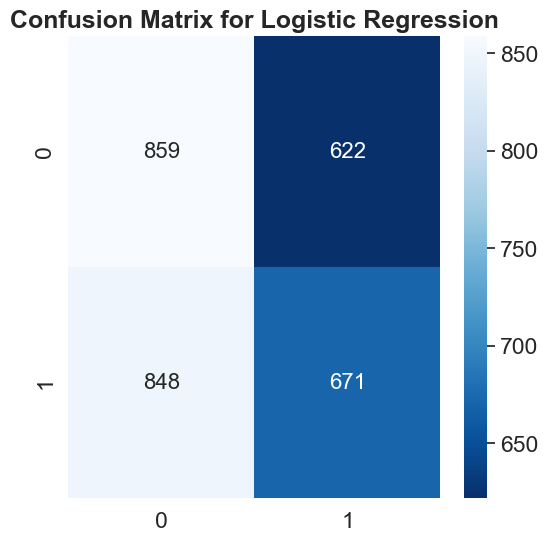

In [61]:
# use a confusion matrix model
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix

def boyu_conf_matrix(y_test, y_pred):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues_r')
    plt.title('Confusion Matrix for Logistic Regression', weight="bold")
    
#Ploting the confusion matrix 
boyu_conf_matrix(y_test, y_pred)

# A true positive is an outcome where the model correctly predicts the positive class
# A true negative is an outcome where the model correctly predicts the negative class
# A false positive is an outcome where the model incorrectly predicts the positive class
# A false negative is an outcome where the sample belonging to the positive class but being classified wrongly as 
# belonging to the negative class

# Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN.
# Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN.
# Precision (true positives / predicted positives) = TP / TP + FP.
# Recall (TP/TP+FP)

### K-Nearest Neighbours (KNN)

In [62]:
# Initialize the KNN model
boyu_knn = KNeighborsClassifier()

# Train the model
boyu_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boyu_knn.predict(X_test)

In [63]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
score_knn = accuracy_score(y_test, y_pred)
print("Accuracy Score of KNeighbours Classifier: ", score_knn)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1481
           1       0.51      0.50      0.51      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

Accuracy Score of KNeighbours Classifier:  0.5026666666666667


- Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, it’s 0.50 and for class 1, it’s 0.51.

- Recall (Sensitivity): This is the ratio of correctly predicted positive observations to all observations in the actual class. For both classes, it’s 0.50.

- F1-Score: This is the weighted average of Precision and Recall. It tries to find the balance between precision and recall. For both classes, it’s 0.50.

- Support: This is the number of actual occurrences of the class in the specified dataset. For class 0, it’s 1481 and for class 1, it’s 1519.

- The model’s overall accuracy is approximately 0.5026, which is the ratio of correctly predicted observations to the total observations.

### Meaure Model Performance

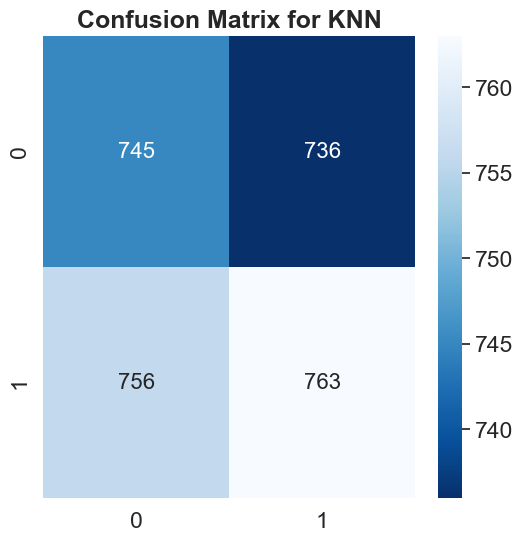

In [64]:
def boyu_conf_matrix(y_test, y_pred):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues_r')
    plt.title('Confusion Matrix for KNN', weight="bold")
    
#Ploting the confusion matrix 
boyu_conf_matrix(y_test, y_pred)

# A true positive is an outcome where the model correctly predicts the positive class
# A true negative is an outcome where the model correctly predicts the negative class
# A false positive is an outcome where the model incorrectly predicts the positive class
# A false negative is an outcome where the sample belonging to the positive class but being classified wrongly as 
# belonging to the negative class

# Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN.
# Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN.
# Precision (true positives / predicted positives) = TP / TP + FP.
# Recall (TP/TP+FP)

### GaussianNB

In [65]:
# Initialize the Gaussian Naive Bayes model
boyu_gnb = GaussianNB()

# Train the model
boyu_gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boyu_gnb.predict(X_test)

In [66]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
score_gnb = accuracy_score(y_test, y_pred)
print("Accuracy Score of Gaussian Naive Bayes: ", score_gnb)

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1481
           1       0.51      0.50      0.51      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

Accuracy Score of Gaussian Naive Bayes:  0.5083333333333333


### Meaure Model Performance

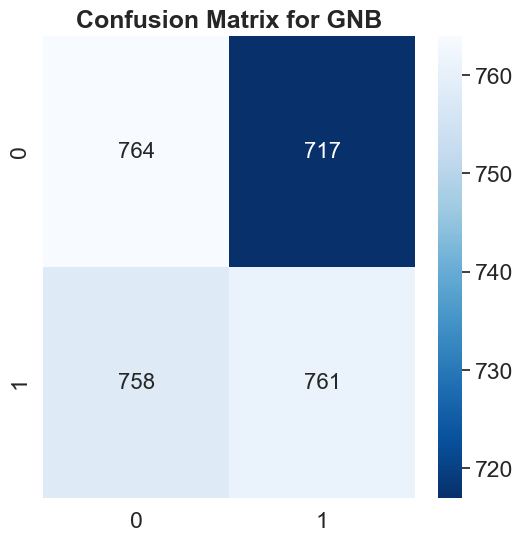

In [67]:
def boyu_conf_matrix(y_test, y_pred):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues_r')
    plt.title('Confusion Matrix for GNB', weight="bold")
    
#Ploting the confusion matrix 
boyu_conf_matrix(y_test, y_pred)

# A true positive is an outcome where the model correctly predicts the positive class
# A true negative is an outcome where the model correctly predicts the negative class
# A false positive is an outcome where the model incorrectly predicts the positive class
# A false negative is an outcome where the sample belonging to the positive class but being classified wrongly as 
# belonging to the negative class

# Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN.
# Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN.
# Precision (true positives / predicted positives) = TP / TP + FP.
# Recall (TP/TP+FP)

### AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model
boyu_ada = AdaBoostClassifier(random_state=123)

# Train the model
boyu_ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boyu_ada.predict(X_test)

C:\Users\boyuc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [69]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy score
score_ada = accuracy_score(y_test, y_pred)
print("Accuracy Score of AdaBoost: ", score_ada)

              precision    recall  f1-score   support

           0       0.51      0.56      0.54      1481
           1       0.53      0.48      0.50      1519

    accuracy                           0.52      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.52      0.52      0.52      3000

Accuracy Score of AdaBoost:  0.52


### Measure Model Performance

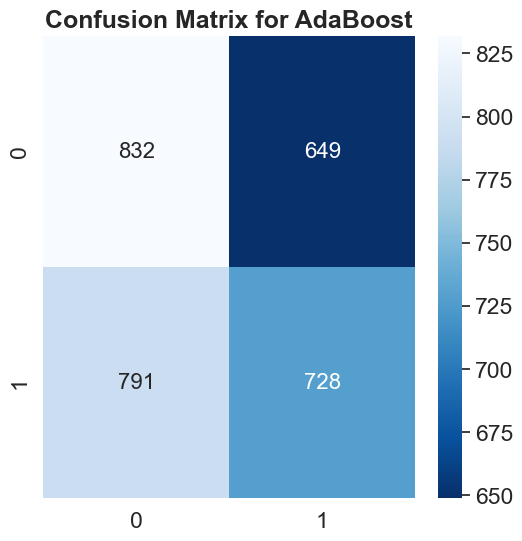

In [70]:
def boyu_conf_matrix(y_test, y_pred):    

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, y_pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues_r')
    plt.title('Confusion Matrix for AdaBoost', weight="bold")
    
#Ploting the confusion matrix 
boyu_conf_matrix(y_test, y_pred)

# A true positive is an outcome where the model correctly predicts the positive class
# A true negative is an outcome where the model correctly predicts the negative class
# A false positive is an outcome where the model incorrectly predicts the positive class
# A false negative is an outcome where the sample belonging to the positive class but being classified wrongly as 
# belonging to the negative class

# Accuracy (all correct / all) = TP + TN / TP + TN + FP + FN.
# Misclassification (all incorrect / all) = FP + FN / TP + TN + FP + FN.
# Precision (true positives / predicted positives) = TP / TP + FP.
# Recall (TP/TP+FP)

### Hyperparameter Tuning

#### Logistic Regression

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the logistic regression model
boyu_lr = LogisticRegression()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(boyu_lr, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Train the model with the best parameters
boyu_lr_best = LogisticRegression(**grid_search.best_params_)
boyu_lr_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = boyu_lr_best.predict(X_test)

# Print the classification report and accuracy score for the model with the best parameters
print(classification_report(y_test, y_pred_best))
print("Accuracy Score of Logistic Regression with Best Parameters: " + str(accuracy_score(y_test, y_pred_best)))

Best parameters:  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.50      0.73      0.59      1481
           1       0.52      0.29      0.38      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.48      3000
weighted avg       0.51      0.51      0.48      3000

Accuracy Score of Logistic Regression with Best Parameters: 0.507


#### Compare which logisitic regression score is better

In [72]:
# Calculate accuracy scores
score_lr_best = accuracy_score(y_test, y_pred_best)

# Print accuracy scores
print("Accuracy Score of Logistic Regression: ", score_lr)
print("Accuracy Score of Logistic Regression with Best Parameters: ", score_lr_best)

# Compare accuracy scores
if score_lr > score_lr_best:
    print("The Original Logistic Regression model performs better.")
elif score_lr < score_lr_best:
    print("The Logistic Regression model with the best parameters performs better.")
else:
    print("Both models perform equally well.")

Accuracy Score of Logistic Regression:  0.51
Accuracy Score of Logistic Regression with Best Parameters:  0.507
The Original Logistic Regression model performs better.


#### KNNeighbour 

In [73]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
boyu_knn = KNeighborsClassifier()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(boyu_knn, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Train the model with the best parameters
boyu_knn_best = KNeighborsClassifier(**grid_search.best_params_)
boyu_knn_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = boyu_knn_best.predict(X_test)

# Print the classification report and accuracy score for the model with the best parameters
print(classification_report(y_test, y_pred_best))
print("Accuracy Score of KNeighbours Classifier with Best Parameters: " + str(accuracy_score(y_test, y_pred_best)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1481
           1       0.52      0.52      0.52      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

Accuracy Score of KNeighbours Classifier with Best Parameters: 0.5106666666666667


#### Compare which KNN score is better

In [74]:
# Calculate accuracy scores
score_knn_best = accuracy_score(y_test, y_pred_best)

# Print accuracy scores
print("Accuracy Score of KNeighbours Classifier: ", score_knn)
print("Accuracy Score of KNeighbours Classifier with Best Parameters: ", score_knn_best)

# Compare accuracy scores
if score_knn > score_knn_best:
    print("The Original KNeighbours Classifier model performs better.")
elif score_knn < score_knn_best:
    print("The KNeighbours Classifier model with the best parameters performs better.")
else:
    print("Both models perform equally well.")

Accuracy Score of KNeighbours Classifier:  0.5026666666666667
Accuracy Score of KNeighbours Classifier with Best Parameters:  0.5106666666666667
The KNeighbours Classifier model with the best parameters performs better.


### Gaussian Naive Bayes

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes model
boyu_gnb = GaussianNB()

# Define the parameter values that should be searched
var_smoothing = np.logspace(0,-9, num=100)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = {'var_smoothing': var_smoothing}

# Instantiate the grid
grid = GridSearchCV(boyu_gnb, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(X_train, y_train)

# View the complete results
print(grid.cv_results_)

# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

{'mean_fit_time': array([0.01427386, 0.01320219, 0.01296477, 0.01294665, 0.0147085 ,
       0.01255414, 0.0112361 , 0.01453252, 0.01485291, 0.01440718,
       0.01425228, 0.01591094, 0.01467023, 0.0097496 , 0.0095535 ,
       0.01191366, 0.02004509, 0.01125829, 0.00931208, 0.01002405,
       0.01150637, 0.01104546, 0.00975549, 0.00926957, 0.01420734,
       0.01204844, 0.01286144, 0.01530168, 0.01101131, 0.01201396,
       0.0113997 , 0.01380968, 0.0127414 , 0.01217856, 0.01317766,
       0.01359694, 0.01242094, 0.01414371, 0.01621318, 0.02035317,
       0.01345763, 0.01285427, 0.00945833, 0.01076465, 0.01084239,
       0.00981345, 0.00980046, 0.00961909, 0.00970254, 0.01176012,
       0.02978821, 0.01461046, 0.01374855, 0.01951294, 0.01555533,
       0.01610601, 0.02505357, 0.02030241, 0.01665428, 0.0102998 ,
       0.01120527, 0.009815  , 0.01005111, 0.01082525, 0.01098874,
       0.00980184, 0.00942049, 0.01060774, 0.00957074, 0.00960603,
       0.01076059, 0.00997846, 0.01185281, 0

### Compare which GNB Score is better

In [76]:
# Calculate accuracy scores
score_gnb_best = accuracy_score(y_test, y_pred_best)

# Print accuracy scores
print("Accuracy Score of GNB Classifier: ", score_gnb)
print("Accuracy Score of GNB Classifier with Best Parameters: ", score_gnb_best)

# Compare accuracy scores
if score_knn > score_knn_best:
    print("The Original GNB Classifier model performs better.")
elif score_knn < score_knn_best:
    print("The GNB Classifier model with the best parameters performs better.")
else:
    print("Both models perform equally well.")

Accuracy Score of GNB Classifier:  0.5083333333333333
Accuracy Score of GNB Classifier with Best Parameters:  0.5106666666666667
The GNB Classifier model with the best parameters performs better.


### AdaBoost

In [77]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Initialize a separate AdaBoost model for the grid search
boyu_ada_grid = AdaBoostClassifier(random_state=123)

# Initialize the GridSearchCV object with boyu_ada_grid instead of boyu_ada
grid_search = GridSearchCV(boyu_ada_grid, param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Get the best model
boyu_ada_best = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = boyu_ada_best.predict(X_test)

# Print the classification report and accuracy score for the model with the best parameters
print(classification_report(y_test, y_pred_best))
print("Accuracy Score of AdaBoost Classifier with Best Parameters: " + str(accuracy_score(y_test, y_pred_best)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\boyuc\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters:  {'learning_rate': 1, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1481
           1       0.52      0.49      0.51      1519

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000

Accuracy Score of AdaBoost Classifier with Best Parameters: 0.5136666666666667


#### Compare which AdaBoost score is better

In [78]:
# Calculate accuracy scores
score_ada_best = accuracy_score(y_test, y_pred_best)

# Print accuracy scores
print("Accuracy Score of AdaBoost Classifier: ", score_ada)
print("Accuracy Score of AdaBoost Classifier with Best Parameters: ", score_ada_best)

# Compare accuracy scores
if score_ada > score_ada_best:
    print("The Original AdaBoost Classifier model performs better.")
elif score_ada < score_ada_best:
    print("The AdaBoost Classifier model with the best parameters performs better.")
else:
    print("Both models perform equally well.")

Accuracy Score of AdaBoost Classifier:  0.52
Accuracy Score of AdaBoost Classifier with Best Parameters:  0.5136666666666667
The Original AdaBoost Classifier model performs better.


## Model Evaluation

### Performance Measurement

#### Find the best model score

In [79]:
# Create a dictionary with model names and their corresponding accuracy scores
model_scores = {
    "Logistic Regression": score_lr,
    "GNB Classifier": score_gnb_best,
    "KNeighbours Classifier": score_knn_best,
    "AdaBoost Classifier": score_ada
}

# Find the model with the highest accuracy score
best_model = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model]

# Print the best model and its accuracy score
print("The best model is " + best_model + " with an accuracy score of " + str(best_score))

The best model is AdaBoost Classifier with an accuracy score of 0.52


### Evaluate the performance of the best model score

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions for boyu_ada
y_pred = boyu_ada.predict(X_test)

# Evaluation metrics for boyu_ada
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Model': ['AdaBoost Classifier'],
    'Accuracy': [f"{accuracy:.2%}"],
    'Precision': [f"{precision:.2%}"],
    'Recall': [f"{recall:.2%}"],
    'F1 Score': [f"{f1:.2%}"],
    'ROC AUC Score': [f"{roc_auc:.2%}"]
})

# Display the DataFrame
display(metrics_df)

Model Accuracy Precision  Recall F1 Score ROC AUC Score
0  AdaBoost Classifier   52.00%    52.87%  47.93%   50.28%        52.05%

- Accuracy (52.00%): This is the proportion of true results (both true positives and true negatives) among the total number of cases examined. An accuracy of 52% means that the model correctly predicted stroke occurrence in 52% of the cases.

- Precision (52.87%): Precision is the proportion of true positive results among the total predicted positives. A precision of 52.87% means that out of all the cases where the model predicted a stroke, 52.87% actually had a stroke.

- Recall (47.93%): Recall is the proportion of true positive results among the total actual positives. A recall of 47.93% means that the model correctly identified 47.93% of all actual stroke cases.

- F1 Score (50.28%): The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. An F1 score of 50.28% indicates a balance between precision and recall in this model.

- ROC AUC Score (52.05%): This is the area under the receiver operating characteristic (ROC) curve, which plots the true positive rate against the false positive rate. A ROC AUC score of 52.05% means that the model has a 52.05% chance of correctly distinguishing between a patient with a stroke and a patient without a stroke.

### Model Explainability

In [81]:
# Install the 'lime' library using pip
!pip install lime

# Import necessary modules from the 'lime' library
import lime
import numpy as np
from lime import lime_tabular

# Assuming X_train is the training data for your machine-learning model
# and it is a pandas DataFrame with columns representing features

# Create a LimeTabularExplainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Convert X_train to a numpy array
    feature_names=X_train.columns,    # Set feature names from the DataFrame columns
    class_names=['No Stroke', 'Stroke'],      # Set class names for classification (replace with actual class names)
    mode='classification'             # Specify 'classification' for classification problems
)

### Interpreting Stroke Prediction with Lime at Index 1

In [82]:
# Explain the prediction for a specific data row 
exp1 = explainer.explain_instance(
    data_row=X_test.iloc[1],          # Provide the data instance to be explained
    predict_fn=boyu_ada.predict_proba    # Provide the prediction function of your model
)

# Display the explanation in a Jupyter notebook (if using a Jupyter environment)
exp1.show_in_notebook(show_table=True)

C:\Users\boyuc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [83]:
# Print the features of a specific test instance for inspection
print(X_test.iloc[1])

Age                                 34.00
Hypertension                         0.00
Heart Disease                        0.00
Average Glucose Level               71.00
Body Mass Index (BMI)               32.52
Stroke History                       1.00
Stress Levels                        3.75
Systolic_BP                        137.00
Diastolic_BP                       102.00
HDL                                 54.00
LDL                                109.00
Gender_Female                        0.00
Gender_Male                          1.00
Smoking Status_Currently Smokes      0.00
Smoking Status_Formerly Smoked       0.00
Smoking Status_Non-smoker            1.00
Alcohol Intake_Frequent Drinker      1.00
Alcohol Intake_Never                 0.00
Alcohol Intake_Rarely                0.00
Alcohol Intake_Social Drinker        0.00
Physical Activity_High               0.00
Physical Activity_Low                1.00
Physical Activity_Moderate           0.00
Family History of Stroke_No       

Based on the result above:

- Prediction probabilities: This is the model’s estimated probabilities for each class. In this case, the model predicts with 50% probability that the patient is unlikely to get a stroke, and with 50% probability that the patient is likely to get a stroke.
  
- Feature value: This is a bar chart showing the contribution of each feature to the prediction. The length and direction of the bar indicate the magnitude and direction of the contribution. For example, a long bar extending to the right (orange) means that the feature strongly indicates that the patient is likely to get a stroke, while a long bar extending to the left (blue) means that the feature strongly indicates that the patient is unlikely to get a stroke. The features are sorted by their contribution to the prediction.

- The values of Smoking Status_Currently Smokes, older Age, Physical Activity_low, and family_history_of_stroke_yes will increase the chance of getting a stroke to be classified as Likely to get a Stroke.

### Interpreting Stroke Prediction with Lime at Index 2

In [84]:
# Explain the prediction for a specific data row 
exp1 = explainer.explain_instance(
    data_row=X_test.iloc[2],          # Provide the data instance to be explained
    predict_fn=boyu_ada.predict_proba    # Provide the prediction function of your model
)

# Display the explanation in a Jupyter notebook (if using a Jupyter environment)
exp1.show_in_notebook(show_table=True)

C:\Users\boyuc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [85]:
# Print the features of a specific test instance for inspection
print(X_test.iloc[2])

Age                                 90.00
Hypertension                         0.00
Heart Disease                        1.00
Average Glucose Level              196.55
Body Mass Index (BMI)               17.62
Stroke History                       0.00
Stress Levels                        5.56
Systolic_BP                        125.00
Diastolic_BP                        88.00
HDL                                 56.00
LDL                                164.00
Gender_Female                        1.00
Gender_Male                          0.00
Smoking Status_Currently Smokes      0.00
Smoking Status_Formerly Smoked       0.00
Smoking Status_Non-smoker            1.00
Alcohol Intake_Frequent Drinker      0.00
Alcohol Intake_Never                 1.00
Alcohol Intake_Rarely                0.00
Alcohol Intake_Social Drinker        0.00
Physical Activity_High               0.00
Physical Activity_Low                1.00
Physical Activity_Moderate           0.00
Family History of Stroke_No       

Based on the result above:

- Prediction probabilities: This is the model’s estimated probabilities for each class. In this case, the model predicts with 50% probability that the patient is unlikely to get a stroke, and with 50% probability that the patient is likely to get a stroke.
  
- Feature value: This is a bar chart showing the contribution of each feature to the prediction. The length and direction of the bar indicate the magnitude and direction of the contribution. For example, a long bar extending to the right (orange) means that the feature strongly indicates that the patient is likely to get a stroke, while a long bar extending to the left (blue) means that the feature strongly indicates that the patient is unlikely to get a stroke. The features are sorted by their contribution to the prediction.

- The values of high LDL, high average glucose level, HDL and Diastolic_BP will increase the chance of getting a stroke to be classified as Likely to get a Stroke.

### Summary of the features affect Stroke Prediction

- Stress Level: High-stress levels increase the likelihood of being classified as ‘Likely to get a Stroke’.

- HDL (High-Density Lipoprotein): Both high HDL and LDL levels increase the likelihood of being classified as ‘Likely to get a Stroke’.

- Age: Older age increases the likelihood of being classified as ‘Likely to get a Stroke’.

- Family History of Stroke: Having a family history of stroke increases the likelihood of being classified as ‘Likely to get a Stroke’.

- LDL (Low-Density Lipoprotein): High LDL levels increase the likelihood of being classified as ‘Likely to get a Stroke’.

- Average Glucose Level: High average glucose levels increase the likelihood of being classified as ‘Likely to get a Stroke’.

- Alcohol Intake: Being a social drinker increases the likelihood of being classified as ‘Likely to get a Stroke’.

- Diastolic Blood Pressure (BP): High diastolic BP increases the likelihood of being classified as ‘Likely to get a Stroke’.

## Ethical AI Implementation Guidelines

## Comprehensive and Detailed Documentation of Ethical Considerations:

### Data Collection:
The dataset used for stroke prediction is synthetically generated, eliminating the inclusion of real patient data and addressing privacy concerns. Comprehensive synthetic data generation process documentation has been provided to ensure transparency and clarity.

### Informed Consent:
Given the synthetic nature of the dataset, traditional informed consent is not applicable. However, detailed documentation of the algorithms and processes used in generating synthetic data is provided to maintain transparency and inform stakeholders about the dataset's origin.

### Design Thinking Process:

#### Empathize:
Understanding the potential impact of the stroke prediction model on individuals and healthcare providers, considering the ethical implications of data-driven decision-making.

#### Define:
Clearly outlining the objectives of the project, the importance of stroke prediction, and the ethical principles guiding the development and deployment of the AI model.

#### Ideate:
Brainstorming and exploring various approaches to synthetic data generation, model development, and implementation to ensure alignment with ethical considerations and stakeholder needs.

#### Prototype:
Developing and refining the synthetic data generation process, model training, and evaluation methods to incorporate ethical considerations and transparency from the early stages.

#### Test and Assess:
Thoroughly evaluating the model's performance, potential biases, and ethical implications through testing scenarios and assessing the impact on different demographic groups.

### Proactive Risk Assessment:

#### Privacy Risks:
The synthetic nature of the dataset serves as a privacy safeguard. The documentation emphasizes this aspect and explicitly states the measures taken to prevent reverse engineering and the identification of individuals in the original data.

#### Misuse of Data:
Acknowledging the potential for misuse, the guidelines underscore the importance of thorough validation before deploying the model for critical healthcare decisions. Ethical application and responsible use are highlighted as key principles.

### Transparent Communication:

#### Transparency in Data Usage:
The documentation provides a detailed explanation of how data is used for model training. It covers the significance of each feature, the handling of missing values, and efforts made to address biases. The model's decision-making process is transparently communicated to stakeholders, including classmates, who are made aware of the ethical challenges associated with the dataset and the AI system.

#### Transparency in Model Limitations:
Transparent communication is maintained regarding the limitations of the synthetic data, potential inaccuracies, and constraints of the AI model. Stakeholders are aware of the ethical challenges associated with the dataset and the AI system.

### AI Ethics and Governance – Explainability:

#### Explainable AI Models:
The development process ensures that AI models, especially the chosen AdaBoost model, are explainable. Stakeholders can understand and trust the model’s decisions, promoting accountability and transparency.

#### Interpretation Tools:
Utilizing tools and methodologies, such as LIME, that help in interpreting the AdaBoost model's decisions. These tools break down complex decisions into understandable insights, making them accessible to non-technical stakeholders.

#### Training Data Insights:
Providing insights into the training data to understand the AdaBoost model’s learning process. This includes explaining feature importance, decision pathways, and potential biases identified through the model explainability process.

### Mitigate Biases and Ensure Fairness:

#### Identifying Biases:
A thorough analysis is conducted to identify potential biases within the synthetic data. Efforts are made to ensure representation from diverse demographic groups, and areas where biases might emerge are identified.

#### Mitigating Biases:
Corrective measures are implemented in the synthetic data generation process to address underrepresented groups. The AdaBoost model is adjusted to prevent unfair advantages or disadvantages based on demographic factors. Regular monitoring and updates are emphasized.

### AI Ethic and Governance – Continuous Improvement:

#### Collecting Feedback:
Regularly updating and refining the AdaBoost model to enhance its explainability and overall performance. Actively seeking feedback from stakeholders, including lecturers and experts, to address any ethical concerns and meet the specific needs and challenges of the stroke prediction project.

### Prioritize Ethical Considerations in Decision-Making:

#### Ethical Decision-Making Process:
A dedicated process for ethical decision-making is established, potentially involving an ethics review board or consultation with ethicists. Decisions consider the broader impact on classmates and affected communities.

#### Prioritizing Ethics:
A cultural emphasis is placed on prioritizing ethical considerations at every phase of the project. From data collection to model deployment, the guidelines stress the importance of ethical guidelines to foster responsible AI development and usage.

### Deployment and API:

#### Flask Application:
Before deploying the model to an API within a Flask application, a comprehensive ethical review of the deployment process is conducted. This includes ensuring that the API adheres to data privacy regulations, and access controls are in place to prevent unauthorized use.

#### Accessibility and Inclusivity:
Consideration is given to make the Flask application accessible and inclusive, ensuring that the stroke prediction tool reaches a diverse user base. The application is designed to be user-friendly, with clear instructions on its purpose, limitations, and ethical considerations.

#### Continuous Monitoring:
Implementing continuous monitoring of the deployed model and API to identify any unforeseen ethical issues or biases that may arise in real-world usage. Regular updates are planned to address emerging ethical challenges and improve the overall fairness and transparency of the system.

#### User Education:
Providing clear documentation and educational materials to users of the Flask application, explaining the limitations of the model, potential biases, and the importance of responsible and ethical use. Encouraging users to be aware of the ethical implications of utilizing AI for healthcare predictions.

This extended ethical framework covers the entire lifecycle of the AI project, from data collection to model deployment, ensuring that ethical considerations are integrated into every phase of development and usage.

## Package my model

In [86]:
import pickle

# Save the trained model as a pickle string.
with open('boyu_ada.pkl', 'wb') as f:
    pickle.dump(boyu_ada, f)

### View the accuracy score from pkl file

In [87]:
# Load the model from the pickle file.
with open('boyu_ada.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming X_test is your test features and y_test is your test labels
score = loaded_model.score(X_test, y_test)

# Print the model accuracy score
print("AdaBoost Classifier model has an accuracy score of " + str(score))

AdaBoost Classifier model has an accuracy score of 0.52
